In [45]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from diffusers import StableDiffusionPipeline
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [46]:
device = "cuda" if torch.cuda.is_available() else "cpu"
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4").to(device)

pipe.safety_checker = lambda images, **kwargs: (images, [False] * len(images))

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
model = GPT2LMHeadModel.from_pretrained('gpt2')
model.eval()

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [54]:
def generate_caption(theme, max_length=30):
    input_text = f"{theme} meme:"
    input_ids = tokenizer.encode(input_text, return_tensors='pt')

    attention_mask = torch.ones(input_ids.shape, device=input_ids.device)
    with torch.no_grad():
        output = model.generate(input_ids, max_length=max_length, num_return_sequences=1, attention_mask=attention_mask)

    return tokenizer.decode(output[0], skip_special_tokens=True).replace(input_text, "").strip()

In [48]:
def generate_image(prompt):
    image = pipe(prompt, num_inference_steps=50).images[0]
    return image

In [56]:
def create_meme(theme):
    caption = generate_caption(theme)
    image = generate_image(theme)

    # Code generated by gpt
    draw = ImageDraw.Draw(image)
    font = ImageFont.load_default()

    bbox = draw.textbbox((0, 0), caption, font=font)
    text_width = bbox[2] - bbox[0]
    text_height = bbox[3] - bbox[1]

    width, height = image.size

    text_x = (width - text_width) // 2
    text_y = height - text_height - 10

    outline_color = "black"
    for offset in [-1, 1]:
        draw.text((text_x + offset, text_y), caption, font=font, fill=outline_color)
        draw.text((text_x, text_y + offset), caption, font=font, fill=outline_color)

    draw.text((text_x, text_y), caption, font=font, fill="white")

    plt.figure(figsize=(10, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


  0%|          | 0/50 [00:00<?, ?it/s]

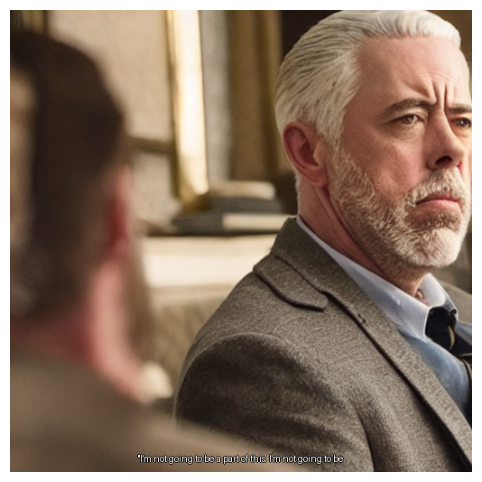

In [60]:
theme = "Logan Roy from succession roasting others"
create_meme(theme)